Scalable Machine Learning in Python 
===================
with Scikit-Learn and Dask 
===============
**May 2017**

Ian Stokes-Rees [@ijstokes](http://twitter.com/ijstokes)

<a href=http://dask.pydata.org ><img src=https://www.continuum.io/sites/default/files/dask_stacked.png
 width=200 />
</a>

[http://bit.ly/scaleml-dask-wkshp](http://bit.ly/scaleml-dask-wkshp)


## Description

This hands-on 3 hour workshop will give participants an opportunity to explore [Dask](http://dask.pydata.org), a parallel computing framework for Python.  We will start with an overview of Dask and the problem it was designed to address, and then look at three exercises that demonstrate the Dask parallel wrappers for [Pandas](http://pandas.pydata.org), [NumPy](http://www.numpy.org), and [Scikit-Learn](http://www.scikit-learn.org).

<table>
<tr><td>
<a href=http://dask.pydata.org ><img src=https://www.continuum.io/sites/default/files/dask_stacked.png
 width=200 />
</a>

</td>
<td>
<a href=http://scikit-learn.org/ ><img src=http://scikit-learn.org/stable/_images/scikit-learn-logo-notext.png
 width=200 />
</a>
</td>
<td>
<a href=http://pandas.pydata.org ><img src=http://people.math.sc.edu/etpalmer/Images/pandas_logo.png
 width=200 />
</a>
<br/>
<a href=http://www.numpy.org ><img src=https://valohai.com/static/img/support-logos/numpy-simple.svg
 width=200 />
</a>
</td></tr>
</table>

Presenter
--------

<table>

<tr><td>
<font size=+2><b>Ian Stokes-Rees</b> [@ijstokes](http://twitter.com/ijstokes)
<br/>[ijstokes@continuum.io](mailto:ijstokes@continuum.io)
<br/>
[http://about.me/ijstokes](http://about.me/ijstokes)
<br/>
[http://linkedin.com/in/ijstokes](http://linkedin.com/in/ijstokes)
<br/></font>
</td>
<td>
<a href=https://continuum.io ><img src=http://ijstokes-public.s3.amazonaws.com/dspyr/img/AnacondaCIO_Logo width=400 />
</a>
</td></tr>
</table>

Acknowledgements
---------------
Adapted from material created by:
* [Matthew Rocklin](https://github.com/mrocklin)
* [Ben Zaitlen](https://github.com/quasiben)
* [Min Ragan-Kelley](https://github.com/minrk)
* [Olivier Grisel](https://github.com/ogrisel)

In particular:
* [PyCon 2017 Parallel Data Analysis Tutorial](https://us.pycon.org/2017/schedule/presentation/189/)
* [Dask Tutorial](https://github.com/dask/dask-tutorial)
* [Dask Talk](http://matthewrocklin.com/slides/dask-short#)

Assets and Reference
-------------------
This presentation:
* Anaconda Cloud: https://anaconda.org/ijstokes/scaleml-dask-wkshp
* GitHub: https://github.com/ijstokes/scaleml-dask-wkshp

The material is based on the BSD-3 open source Dask project, which is included in the Anaconda Distribution:
* Docs: http://dask.pydata.org/
* GitHub: https://github.com/dask/dask
* Support: http://dask.pydata.org/en/latest/support.html

Setup
-----
* [Download Anaconda 4.3 for Python 3.6](http://continuum.io/downloads)
* Clone or download the GitHub repo for the workshop:
```bash
git clone git@github.com:ijstokes/scaleml-dask-wkshp.git
```

* Create a conda environment for the workshop:
```bash
conda env create ijstokes/daskwkshp
source activate daskwkshp # macOS and *nix
activate daskwkshp # Windows
```

* If that doesn't work, this should do the trick:
```bash
conda create -n daskwkshp dask scikit-learn \
    jupyter notebook=5 python-graphviz pandas \
    python=3.6
```

## Before we start

We need to get some data to work with.
We are going to generate some [fake stock data](https://github.com/mrocklin/fakestockdata) by adding a bunch of points between real stock data points. This will take a few minutes the first time we run it.

In [ ]:
# or do this from the command line
%run ./prep.py

## Introductions
<table>

<tr><td>
At Continuum we say 
<br/>
<font size=+2><b>*"Programming Python with Anaconda
<br/>is more fun with a friend"*</b></font>
</td>
<td>
<a href=https://continuum.io ><img src=http://ijstokes-public.s3.amazonaws.com/dspyr/img/AnacondaCIO_Logo width=400 />
</a>
</td></tr>
</table>

### Introduce yourself to the people on either side of you

There is only one of me, so you're going to need to rely on each other for help during exercises!

# Exercise 1.1: Setup and Basic Dask Operations
Take 20 minutes to get setup and then run through these basic Dask operations to see how it provides data structures similar to a `numpy.array` or `pandas.dataframe`

In [2]:
import dask.array as da
a = da.random.randint(size=(60,60), low=1, high=10, chunks=(20,20))

In [3]:
a

dask.array<da.random.randint, shape=(60, 60), dtype=int64, chunksize=(20, 20)>

In [4]:
type(a)

dask.array.core.Array

Dask does ***lazy evaluation*** so it is returning a reference to a delayed operation, not yet invoked

In [5]:
a[3,10]

dask.array<getitem, shape=(), dtype=int64, chunksize=()>

`.compute()` is required to actually get back the values

In [6]:
a[3,10].compute()

8

## Same story for vectors

In [8]:
a[3,10:20]

dask.array<getitem, shape=(10,), dtype=int64, chunksize=(10,)>

In [10]:
a[3,10:20].compute()

array([8, 7, 6, 9, 9, 4, 2, 4, 4, 6])

In [11]:
# or regions
a[3:5, 10:20]

dask.array<getitem, shape=(2, 10), dtype=int64, chunksize=(2, 10)>

In [12]:
a[3:5, 10:20].compute()

array([[8, 7, 6, 9, 9, 4, 2, 4, 4, 6],
       [7, 7, 6, 6, 8, 7, 3, 5, 3, 7]])

In [13]:
# Notice what type this gives you, once it is fully reified
type(a[3:5, 10:20].compute())

numpy.ndarray

## ... and methods

In [14]:
a.mean()

dask.array<mean_agg-aggregate, shape=(), dtype=float64, chunksize=()>

In [15]:
a.mean().compute()

5.0608333333333331

## Ex 1.2 Try some computations on `dask.dataframe` objects

In [16]:
b = a.T * a + 100

In [17]:
b

dask.array<add, shape=(60, 60), dtype=int64, chunksize=(20, 20)>

In [18]:
type(b)

dask.array.core.Array

In [19]:
b[3:5,10:20].compute()

array([[140, 156, 148, 172, 154, 104, 112, 124, 116, 142],
       [156, 107, 106, 136, 140, 128, 106, 130, 124, 121]])

In [20]:
b.max()

dask.array<amax-aggregate, shape=(), dtype=int64, chunksize=()>

In [21]:
b.max().compute()

181

## Ex 1.3 Visualize Dask Task Graphs
### These may not work for you
It depends on whether or not graphviz and python-graphviz have installed properly.

If not you'll still be able to do all the exercises, you just won't be able to see the task graphs that Dask is creating.

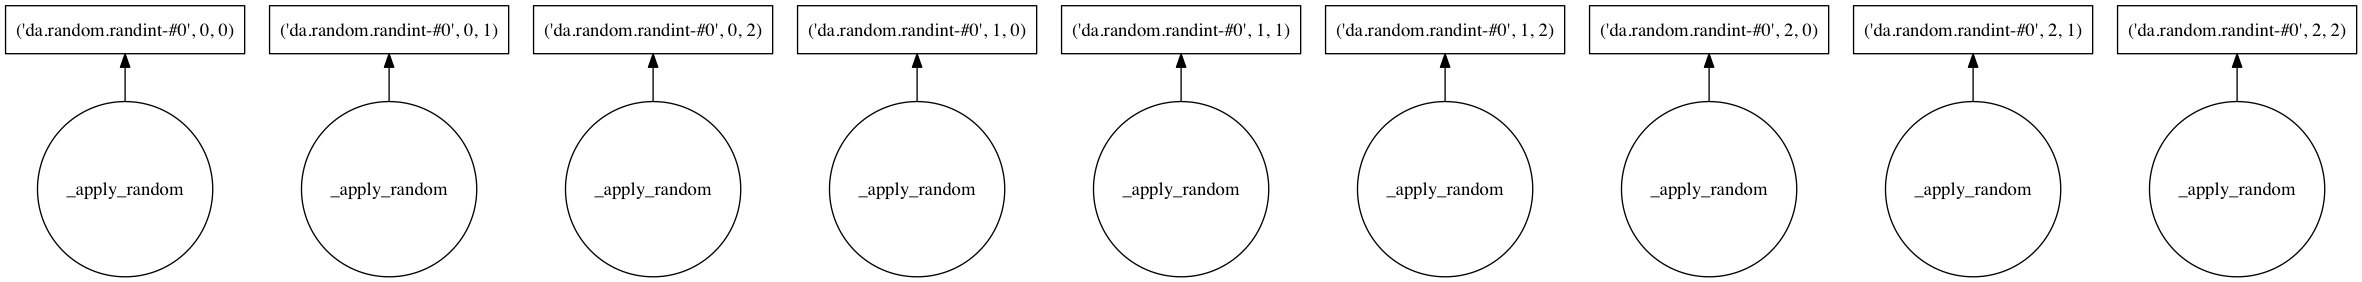

In [22]:
a.visualize()

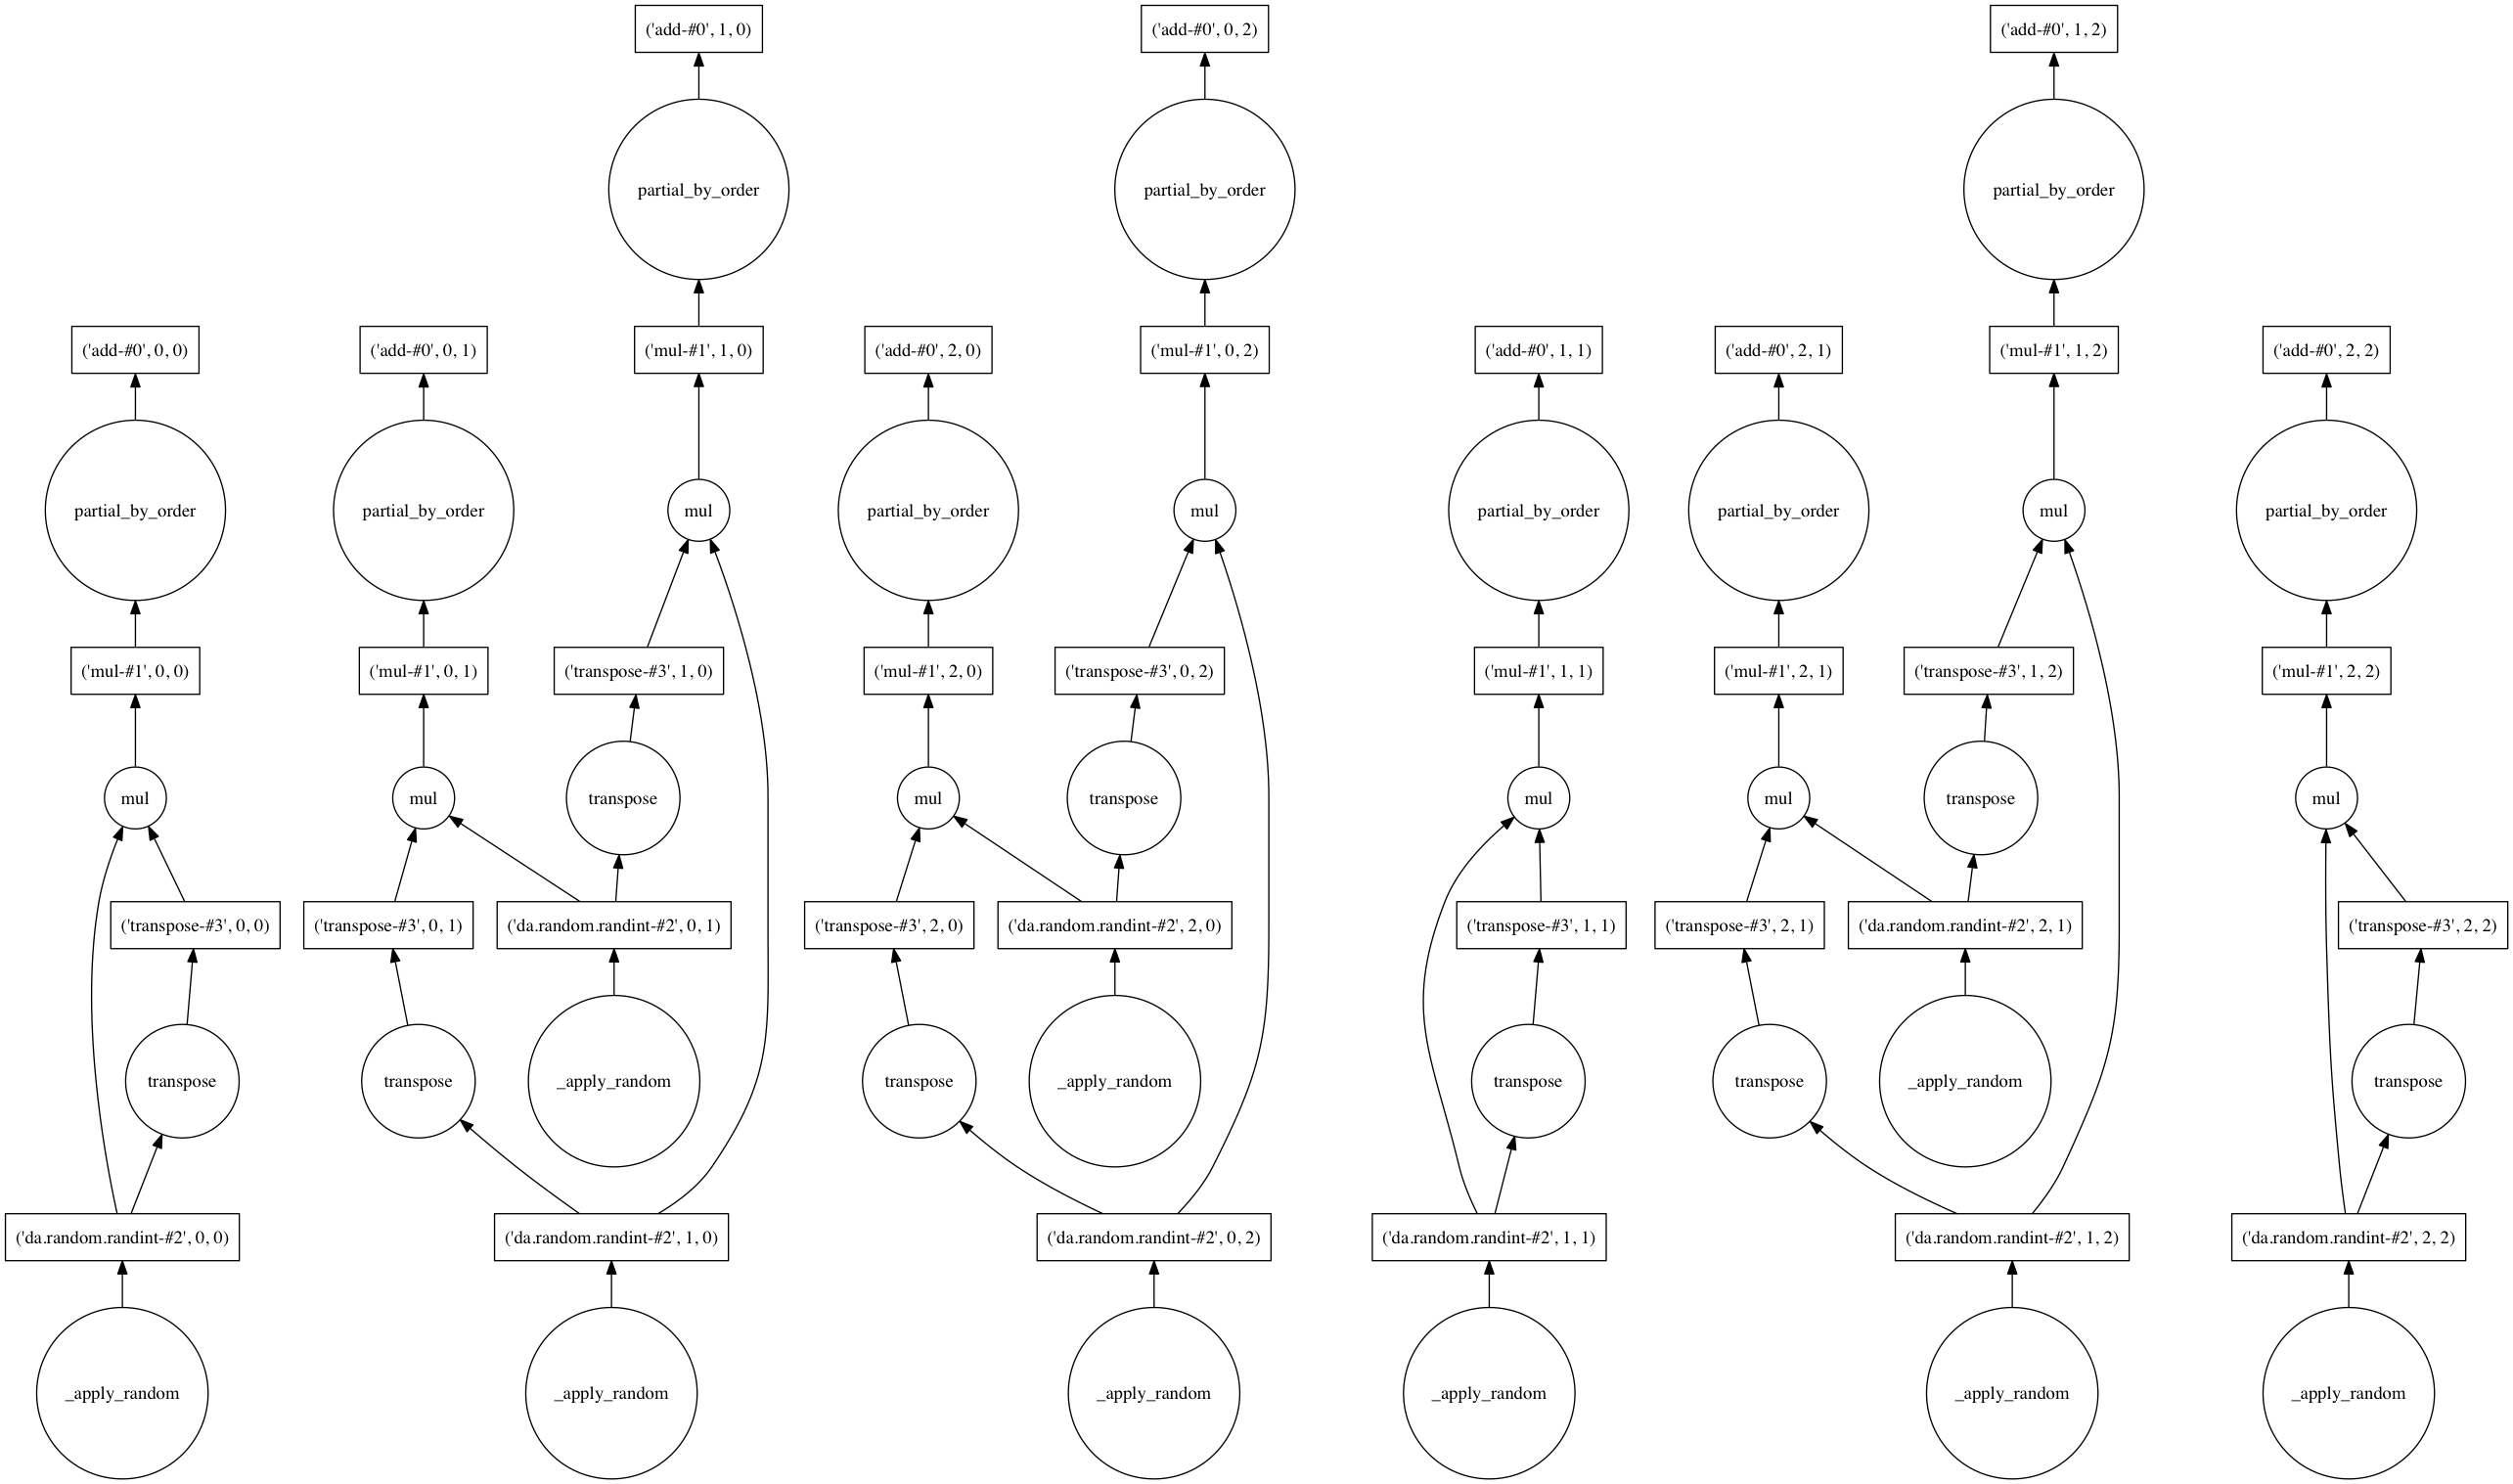

In [23]:
b.visualize()

## Ex 1.4 Dask DataFrame
If you're familiar with the `pandas.dataframe` then the `dask.dataframe` is going to be easy to use

In [24]:
import pandas as pd
pd.options.display.max_rows = 10

In [25]:
# may need to fix slashes in file path if you're on Windows
import dask.dataframe as dd
df = dd.read_csv("./data/minute/aig/2010-01-*.csv", parse_dates=['timestamp']).set_index('timestamp')

In [26]:
df

,close,high,low,open
npartitions=19,,,,
2010-01-04 09:00:00,float64,float64,float64,float64
2010-01-05 09:00:00,...,...,...,...
...,...,...,...,...
2010-01-29 09:00:00,...,...,...,...
2010-01-29 16:00:00,...,...,...,...


In [28]:
len(df)

4009

## Ex 1.5 DataFrame columns

In [29]:
df.close

Dask Series Structure:
npartitions=19
2010-01-04 09:00:00    float64
2010-01-05 09:00:00        ...
                        ...   
2010-01-29 09:00:00        ...
2010-01-29 16:00:00        ...
Name: close, dtype: float64
Dask Name: getitem, 114 tasks

In [30]:
df.close.compute()

timestamp
2010-01-04 09:00:00    30.437
2010-01-04 09:02:00    30.382
2010-01-04 09:04:00    30.337
2010-01-04 09:06:00    30.385
2010-01-04 09:08:00    30.388
                        ...  
2010-01-29 15:52:00    24.080
2010-01-29 15:54:00    24.157
2010-01-29 15:56:00    24.202
2010-01-29 15:58:00    24.231
2010-01-29 16:00:00    24.230
Name: close, Length: 4009, dtype: float64

## Ex 1.6 Dataframe methods

In [31]:
df.close.mean()

dd.Scalar<series-..., dtype=float64>

In [32]:
df.close.mean().compute()

27.82182963332502

In [33]:
%matplotlib inline

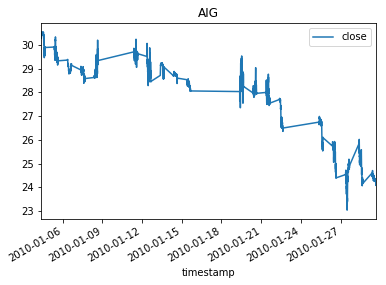

In [34]:
# Pay attention to where .plot() comes in this expression
df[['close']].compute().plot(title='AIG')

## Ex 1.7 Visualize Dataframe Method Task Graphs

Think about what this task graph is telling you about distributed data and distributed data structures

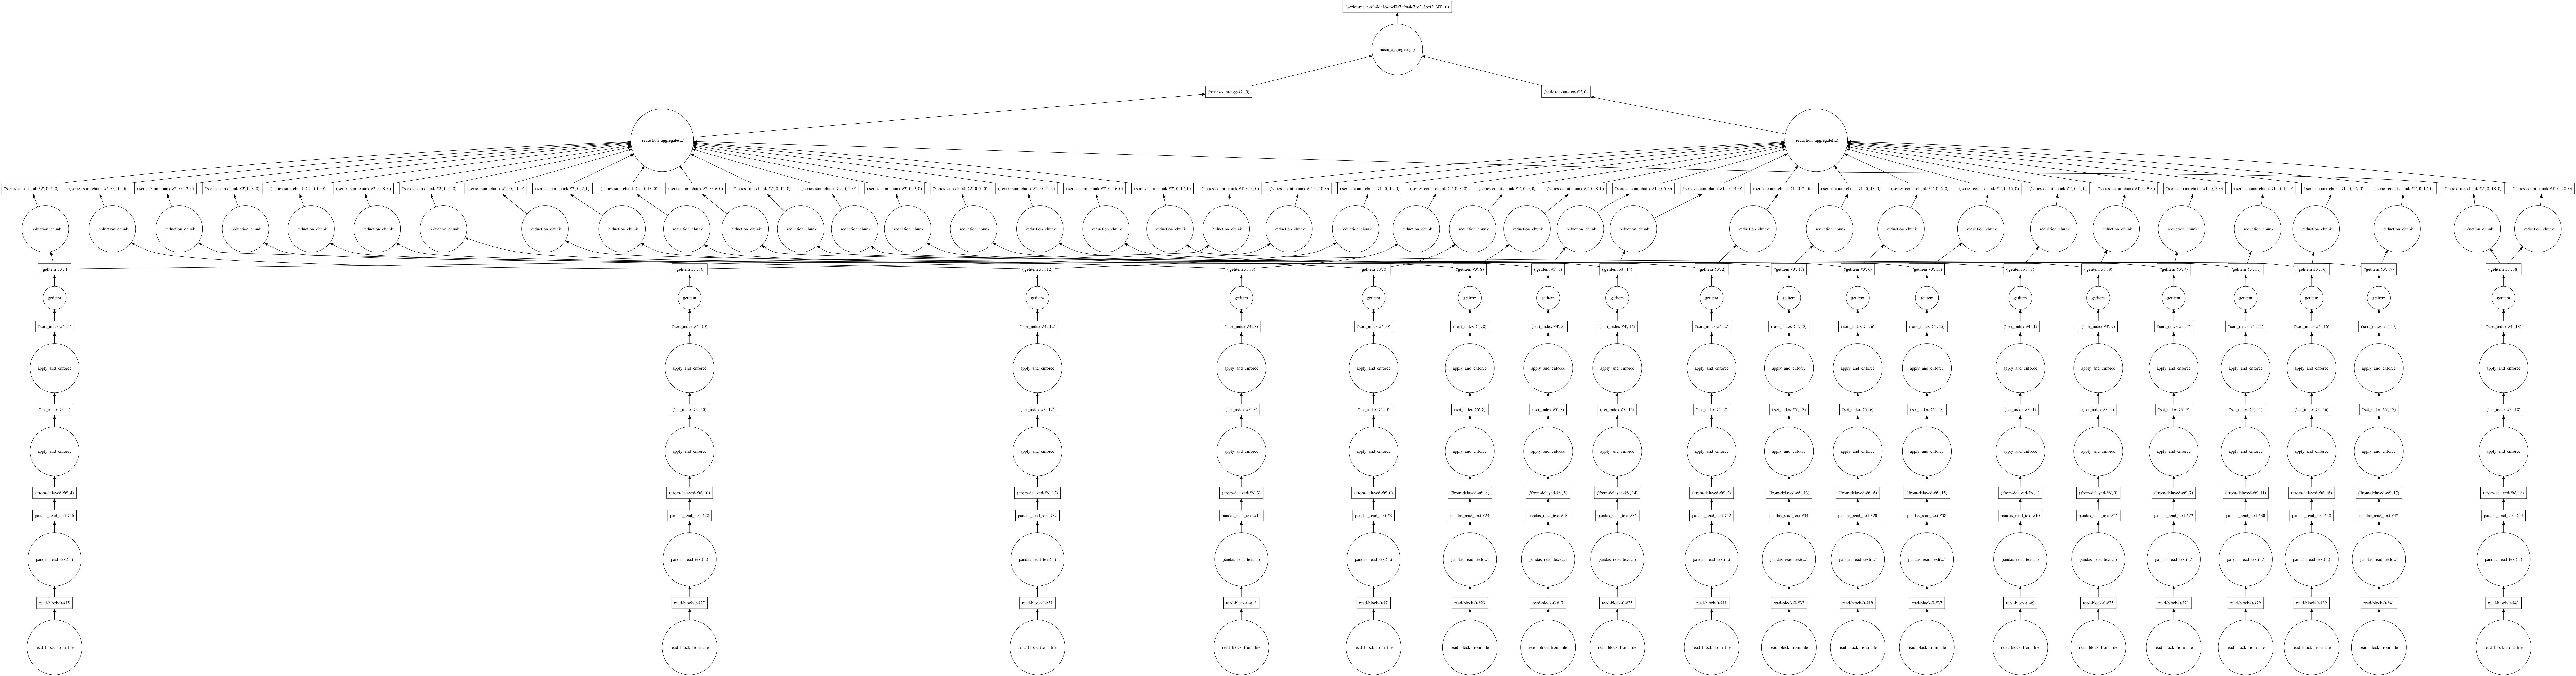

In [35]:
df.close.mean().visualize()

## Dask data loading
Why does the graph and its connections look like this?

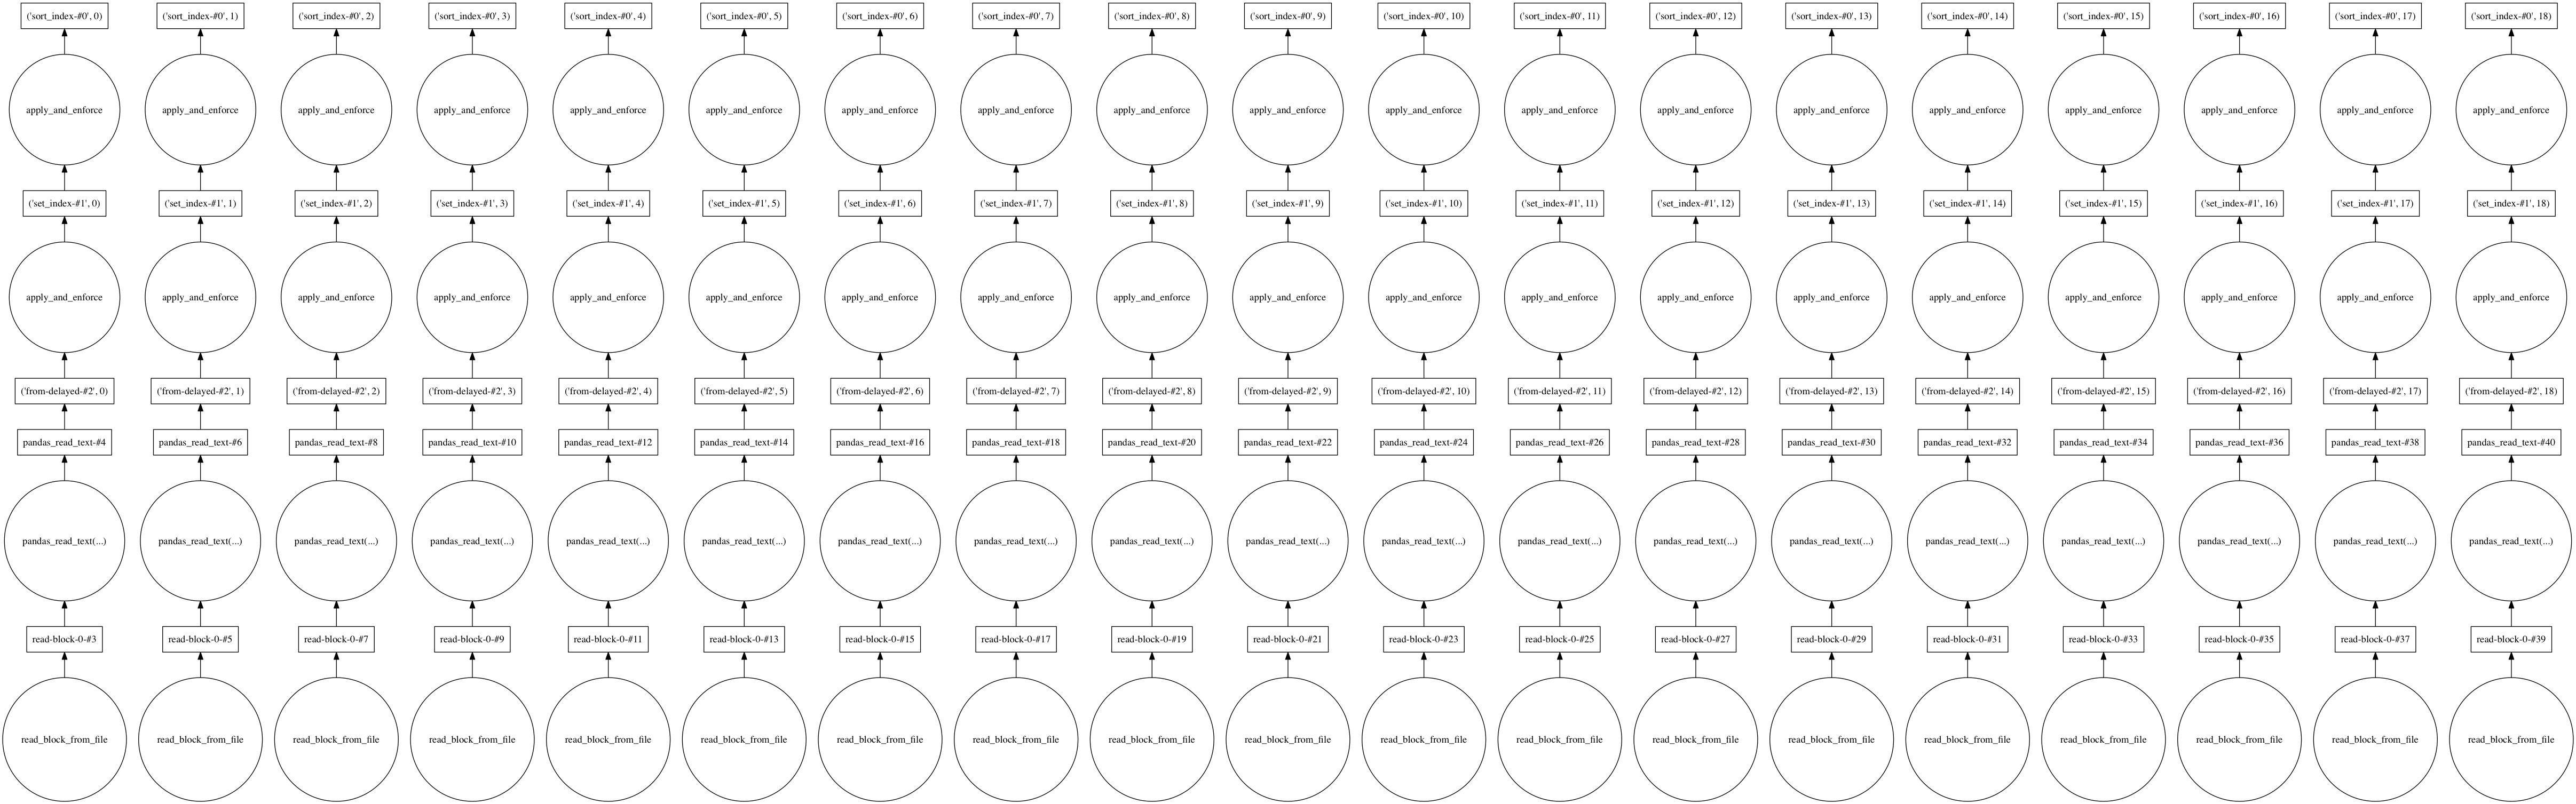

In [36]:
df.visualize()